In [105]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as dt
from datetime import timedelta

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [84]:
PATH_DIR = os.path.join(os.path.dirname(os.path.dirname(os.path.join(os.path.realpath('__file__')))), 'data')
PATH_PRE_PROCESSED = os.path.join(os.path.join(PATH_DIR, 'pre-processed'))
dataset = pd.read_csv(os.path.join(PATH_PRE_PROCESSED, 'dataset_report.csv'), dtype={'CD_CVM':str})

In [85]:
dataset.head()

,CD_CVM,CNPJ_CIA,DENOM_CIA,DT_REFER,DATA,DT_FIM_EXERC,DT_INI_EXERC,ANO_REFERENCIA,TRIMESTRE,CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS,DESPESAS_OU_RECEITAS_OPERACIONAIS,LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL,LUCRO_LIQUIDO,RECEITA_DE_VENDAS,RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS,RESULTADO_BRUTO,RESULTADO_FINANCEIRO
0,003980,33.611.500/0001-19,GERDAU S.A.,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-7.628291e+09,-561670000.0,719045000.0,713346000.0,8.967321e+09,777360000.0,1.339030e+09,-58315000.0
1,021121,29.978.814/0001-87,SUL AMERICA S.A.,2011-03-31,2011-01-01,2011-03-31,2011-01-01,2011,1,-1.567142e+09,-530985000.0,174297000.0,101944000.0,2.118936e+09,20809000.0,5.517940e+08,153488000.0
2,019550,71.673.990/0001-77,NATURA COSMETICOS S.A.,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-4.136650e+08,-662626000.0,300697000.0,201583000.0,1.381433e+09,305142000.0,9.677680e+08,-4445000.0
3,017442,02.390.206/0001-09,LF TEL SA,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-1.252439e+09,-351889000.0,80463000.0,57520000.0,1.864259e+09,259931000.0,6.118200e+08,-179468000.0
4,015253,00.864.214/0001-06,ENERGISA S.A.,2011-06-30,2011-02-01,2011-06-30,2011-04-01,2011,2,-4.014160e+08,-84136000.0,77834000.0,59241000.0,5.873460e+08,101794000.0,1.859300e+08,-23960000.0


In [86]:
dataset.columns

Index(['CD_CVM', 'CNPJ_CIA', 'DENOM_CIA', 'DT_REFER', 'DATA', 'DT_FIM_EXERC',
       'DT_INI_EXERC', 'ANO_REFERENCIA', 'TRIMESTRE',
       'CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS',
       'DESPESAS_OU_RECEITAS_OPERACIONAIS',
       'LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL',
       'LUCRO_LIQUIDO', 'RECEITA_DE_VENDAS',
       'RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS',
       'RESULTADO_BRUTO', 'RESULTADO_FINANCEIRO'],
      dtype='object')

In [87]:
dataset.dtypes

CD_CVM                                                     object
CNPJ_CIA                                                   object
DENOM_CIA                                                  object
DT_REFER                                                   object
DATA                                                       object
DT_FIM_EXERC                                               object
DT_INI_EXERC                                               object
ANO_REFERENCIA                                              int64
TRIMESTRE                                                   int64
CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS                       float64
DESPESAS_OU_RECEITAS_OPERACIONAIS                         float64
LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL     float64
LUCRO_LIQUIDO                                             float64
RECEITA_DE_VENDAS                                         float64
RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS    float64
RESULTADO_

In [88]:
dataset['DT_REFER'] = pd.to_datetime(dataset['DT_REFER'])

In [89]:
#dataset[dataset['DENOM_CIA'].str.contains('IOCHP', regex=False, case=False)]
#dataset[dataset['DENOM_CIA'].str.contains('MAGAZINE', regex=False, case=False)]

In [90]:
company = dataset[dataset['CD_CVM'] == '011932']
#company = dataset[dataset['CD_CVM'] == '22470']

company = company.sort_values(by='DT_REFER')
#company['RECEITA_DE_VENDAS'] = company['RECEITA_DE_VENDAS']/1000000
company.head(50)

,CD_CVM,CNPJ_CIA,DENOM_CIA,DT_REFER,DATA,DT_FIM_EXERC,DT_INI_EXERC,ANO_REFERENCIA,TRIMESTRE,CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS,DESPESAS_OU_RECEITAS_OPERACIONAIS,LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL,LUCRO_LIQUIDO,RECEITA_DE_VENDAS,RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS,RESULTADO_BRUTO,RESULTADO_FINANCEIRO
476,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2011-03-31,2011-01-01,2011-03-31,2011-01-01,2011,1,-5.301490e+08,-48459000.0,83017000.0,56189000.0,6.669810e+08,88373000.0,136832000.0,-5356000.0
1050,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2011-06-30,2011-02-01,2011-06-30,2011-04-01,2011,2,-5.517140e+08,-45848000.0,90765000.0,57178000.0,6.939410e+08,96379000.0,142227000.0,-5614000.0
729,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-6.663450e+08,-52475000.0,98127000.0,65831000.0,8.270080e+08,108188000.0,160663000.0,-10061000.0
2688,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2012-03-31,2012-01-01,2012-03-31,2012-01-01,2012,1,-1.075970e+09,-68107000.0,32063000.0,14297000.0,1.187589e+09,43512000.0,111619000.0,-11449000.0
2947,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2012-06-30,2012-02-01,2012-06-30,2012-04-01,2012,2,-1.360128e+09,-75307000.0,37162000.0,10286000.0,1.510496e+09,75061000.0,150368000.0,-37899000.0
2898,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2012-09-30,2012-03-01,2012-09-30,2012-07-01,2012,3,-1.356782e+09,-76693000.0,42127000.0,33683000.0,1.533778e+09,100303000.0,176996000.0,-58176000.0
5398,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2013-03-31,2013-01-01,2013-03-31,2013-01-01,2013,1,-1.254789e+09,-109119000.0,35327000.0,12368000.0,1.435933e+09,72025000.0,181144000.0,-36698000.0
5665,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2013-06-30,2013-02-01,2013-06-30,2013-04-01,2013,2,-1.322363e+09,-82163000.0,109632000.0,74912000.0,1.574981e+09,170455000.0,252618000.0,-60823000.0
5559,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2013-09-30,2013-03-01,2013-09-30,2013-07-01,2013,3,-1.378675e+09,-105535000.0,66134000.0,42772000.0,1.605004e+09,120794000.0,226329000.0,-54660000.0
8558,011932,61.156.113/0001-75,IOCHPE MAXION S.A.,2014-03-31,2014-01-01,2014-03-31,2014-01-01,2014,1,-1.328580e+09,-97369000.0,45441000.0,24060000.0,1.526550e+09,100601000.0,197970000.0,-55160000.0


Text(0.5, 1.0, 'Receita de Vendas IOCHPE MAXION S.A.')

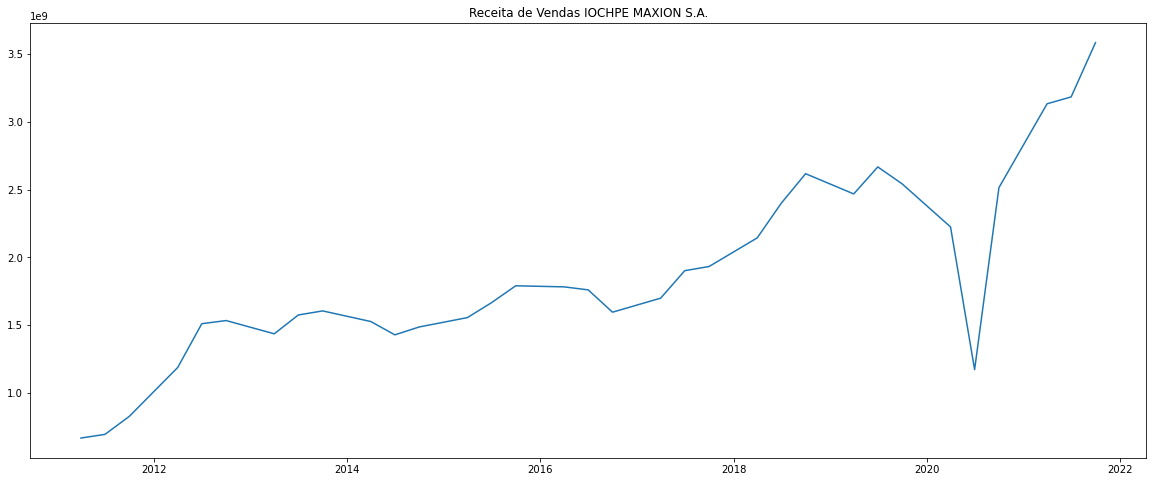

In [91]:
plt.figure(figsize=(20,8))
plt.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'])
plt.title('Receita de Vendas IOCHPE MAXION S.A.')

Text(0.5, 1.0, 'Receita de Vendas IOCHPE MAXION S.A.')

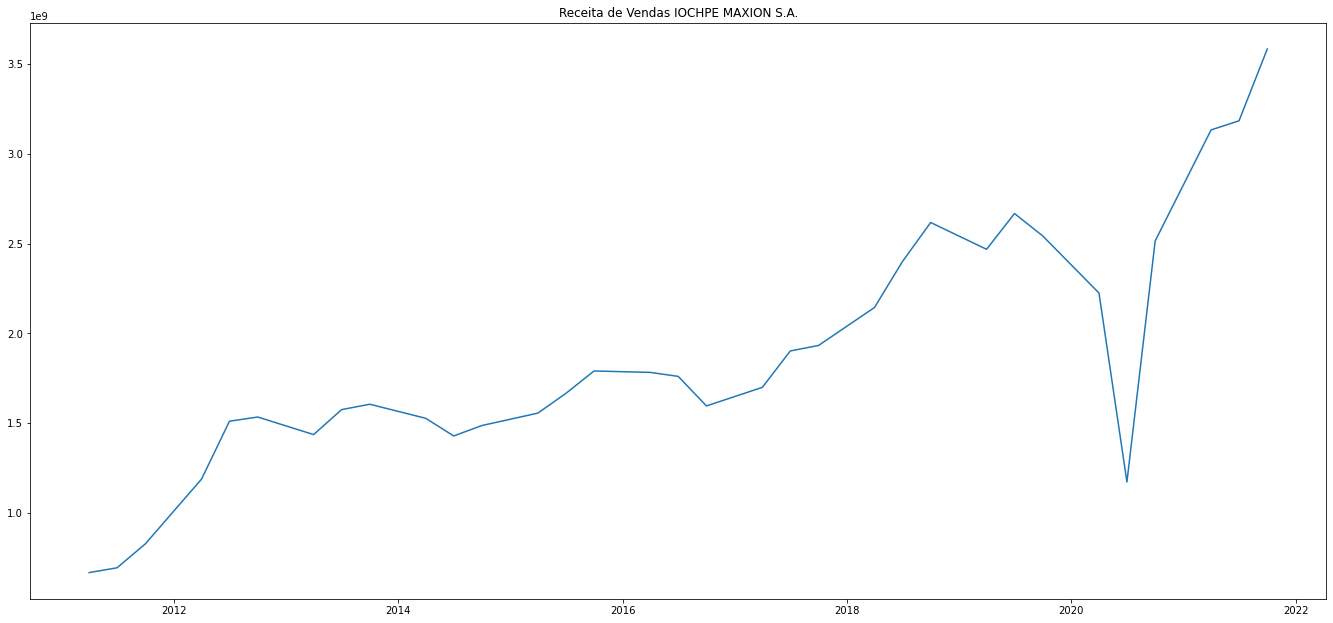

In [92]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'])
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.')

Text(0.5, 0, 'Data')

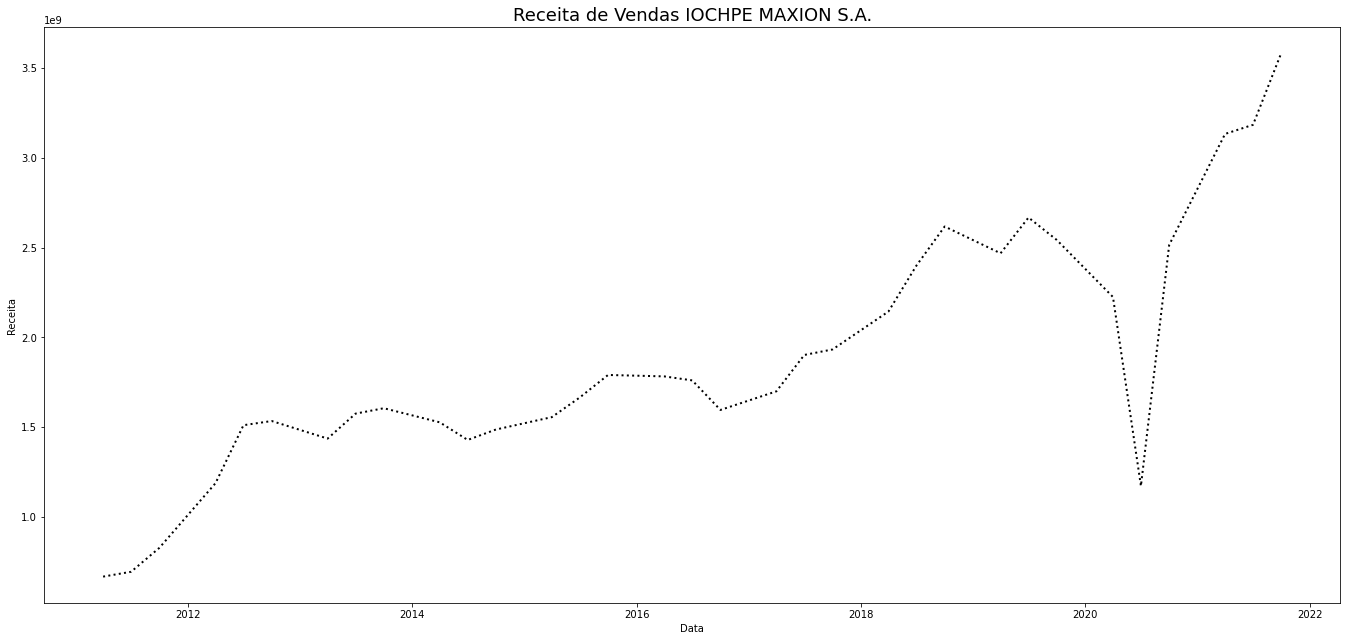

In [93]:
# color: cor da linha; lw: expessura da linha; ls: tipo de linha
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='black', lw=2, ls='dotted')

axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)

Text(0.5, 0, 'Data')

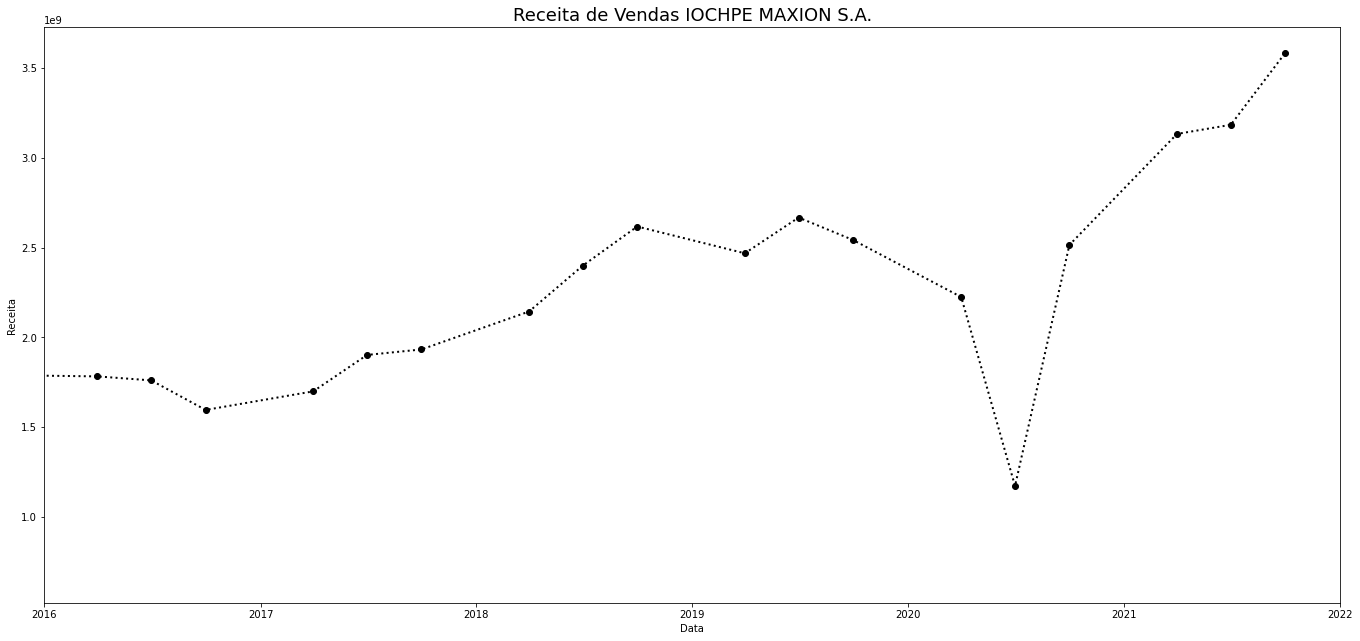

In [94]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='black', lw=2, ls='dotted', marker='o')

# Adicionando um limite para a exibição de datas
axis.set_xlim(dt.datetime(2016,1,1), dt.datetime(2022,1,1))
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)

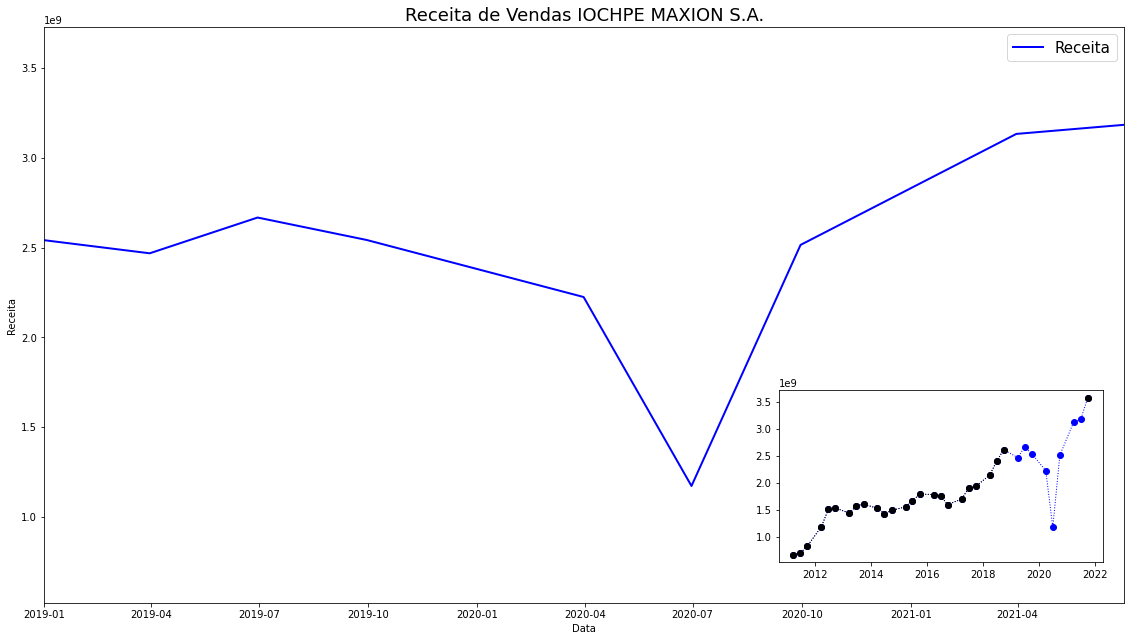

In [95]:
fig = plt.figure(figsize=(15,8))
axis1 = fig.add_axes([0,0,1,1])
axis2 = fig.add_axes([0.68,0.07,0.3,0.3])

axis1.set_xlim(dt.datetime(2019,1,1), dt.datetime(2021,6,30))
axis1.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='blue', lw=2)
axis1.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis1.set_ylabel('Receita', fontsize=10)
axis1.set_xlabel('Data', fontsize=10)
axis1.legend(['Receita'], loc='best', fontsize=15)

left = company['DT_REFER'] < dt.datetime(2019,1,1)
right = company['DT_REFER'] > dt.datetime(2021,6,30)
axis2.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='blue', lw=1, ls='dotted', marker='o')
axis2.plot(company[left]['DT_REFER'], company[left]['RECEITA_DE_VENDAS'], color='black', lw=1, ls='dotted', marker='o')
axis2.plot(company[right]['DT_REFER'], company[right]['RECEITA_DE_VENDAS'], color='black', lw=1, ls='dotted', marker='o')

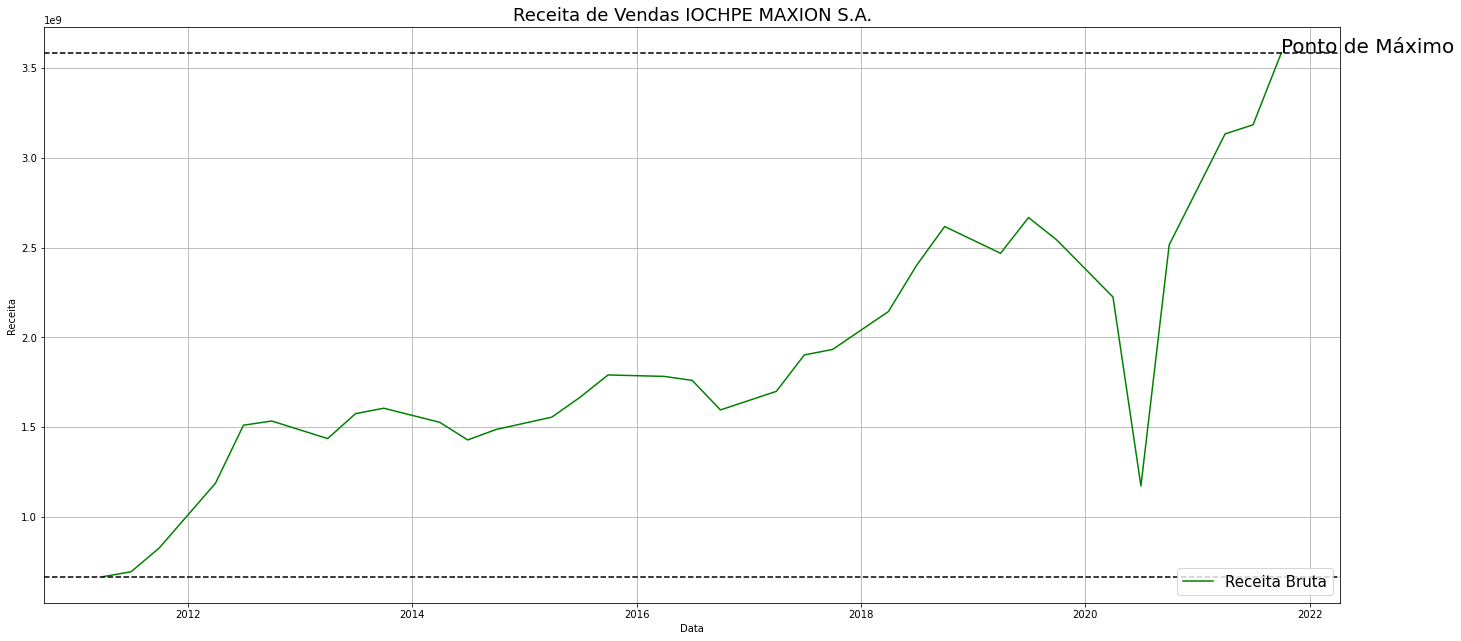

In [96]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='g')

# Adicionando um limite para a exibição de datas
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)
axis.legend(['Receita Bruta'], loc='lower right', fontsize=15)
axis.grid(True)

x1 = company['DT_REFER'][company['RECEITA_DE_VENDAS'].idxmax()]
y1 = max(company['RECEITA_DE_VENDAS'])
axis.annotate('Ponto de Máximo', xy=(x1, y1), fontsize=20)

axis.axhline(min(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')
axis.axhline(max(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')

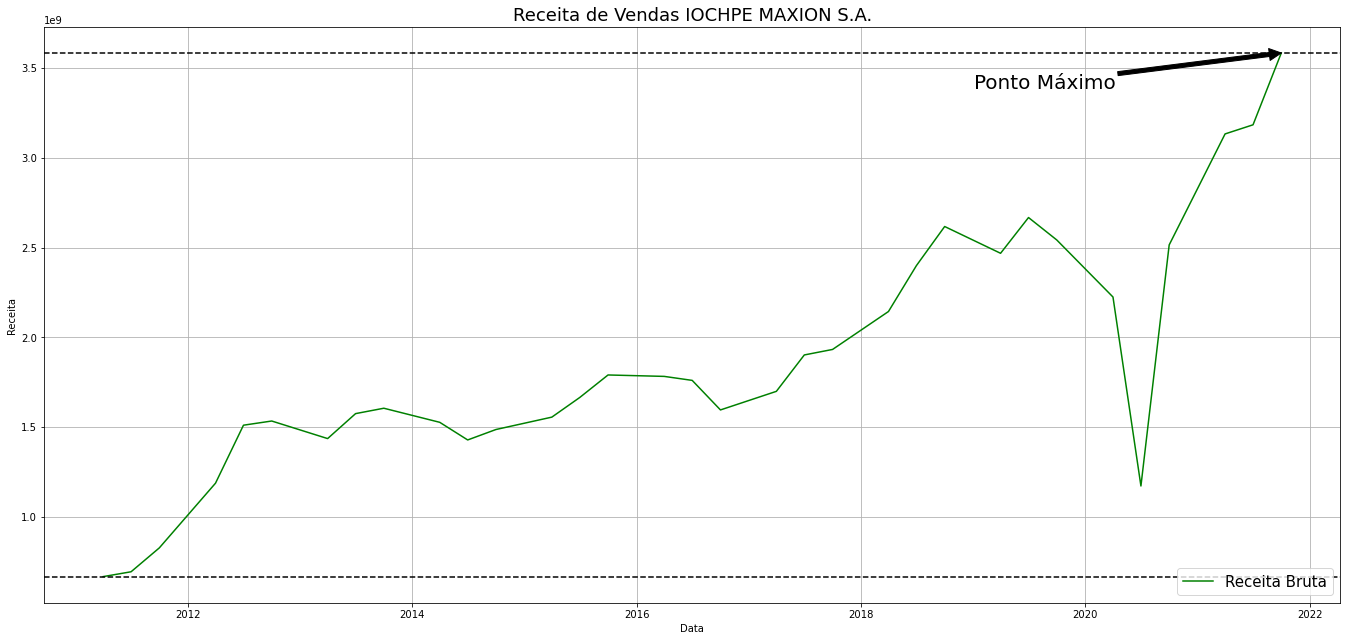

In [97]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='g')

# Adicionando um limite para a exibição de datas
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)
axis.legend(['Receita Bruta'], loc='lower right', fontsize=15)
axis.grid(True)

x1 = company['DT_REFER'][company['RECEITA_DE_VENDAS'].idxmax()]
y1 = max(company['RECEITA_DE_VENDAS'])

x2 = company['DT_REFER'][company['RECEITA_DE_VENDAS'].idxmax()] - timedelta(1000)
y2 = max(company['RECEITA_DE_VENDAS']) - 200000000

axis.annotate('Ponto Máximo', xy=(x1, y1), fontsize=20, xytext=(x2,y2), arrowprops=dict(facecolor='k'))
axis.axhline(min(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')
axis.axhline(max(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')

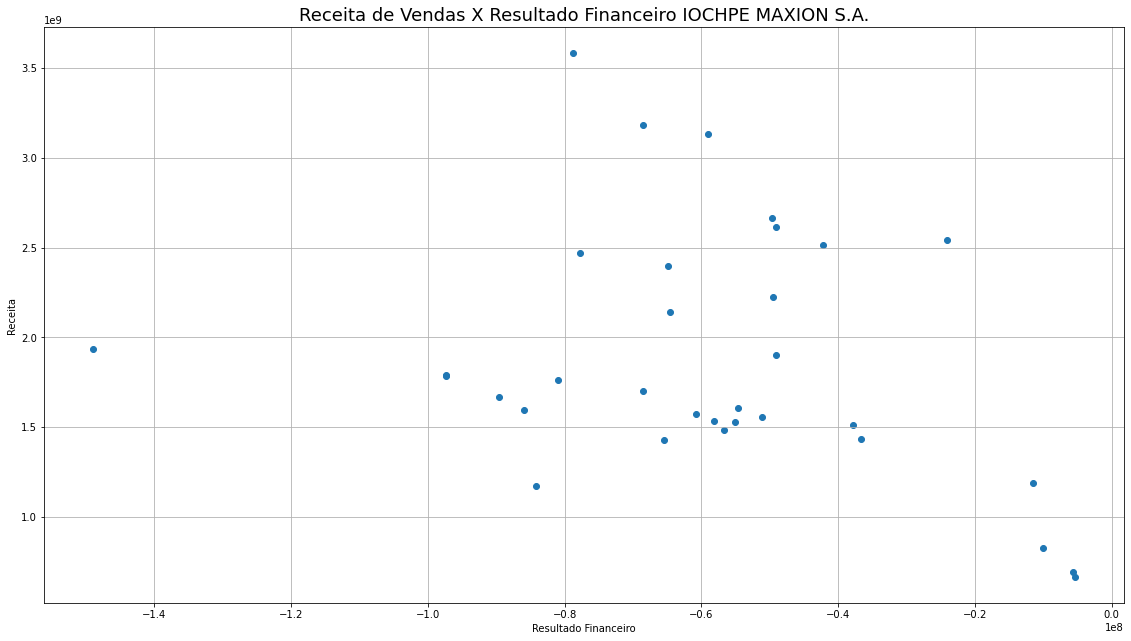

In [98]:
fig = plt.figure(figsize=(15,8))
axis = fig.add_axes([0,0,1,1])

axis.scatter(company['RESULTADO_FINANCEIRO'], company['RECEITA_DE_VENDAS'])

# Adicionando um limite para a exibição de datas
axis.set_title('Receita de Vendas X Resultado Financeiro IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Resultado Financeiro', fontsize=10)
axis.grid(True)

In [117]:
companies = {
'DEXXOS PARTICIPAÇÕES S.A.':'016632',
'SEQUOIA LOGÍSTICA E TRANSPORTES S.A.':'025160',
'VIVARA PARTICIPAÇÕES S.A.':'024805',
'DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS':'009342',
'AMBEV S.A.':'023264'
}

colors = {
'016632':'darkturquoise',
'025160':'yellowgreen',
'024805':'coral',
'009342':'cadetblue',
'023264':'darkblue'
}

mark = {
'016632':'x',
'025160':'o',
'024805':'v',
'009342':'^',
'023264':'8'
}


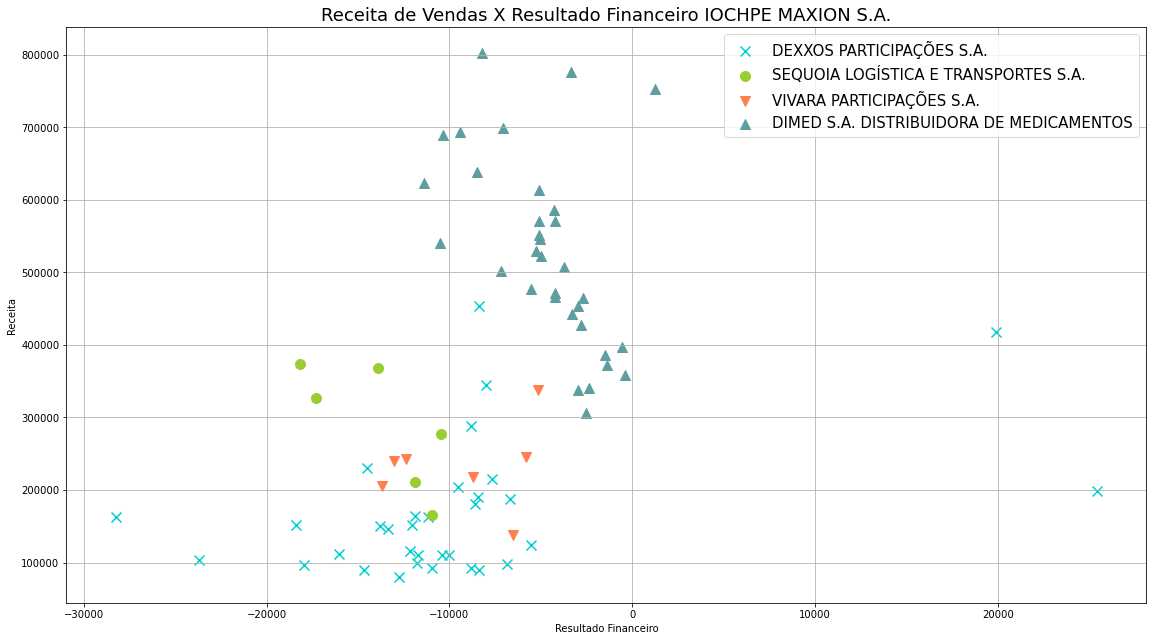

In [118]:
fig = plt.figure(figsize=(15,8))
axis = fig.add_axes([0,0,1,1])

comp = ['016632', '025160', '024805', '009342']
for i in comp:
    temp = dataset[dataset['CD_CVM'] == i]
    axis.scatter(temp['RESULTADO_FINANCEIRO']/1000, temp['RECEITA_DE_VENDAS']/1000,
    color=colors[i], marker=mark[i], s=100)

# Adicionando um limite para a exibição de datas
axis.set_title('Receita de Vendas X Resultado Financeiro', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Resultado Financeiro', fontsize=10)
axis.legend(companies, fontsize=15)
axis.grid(True)

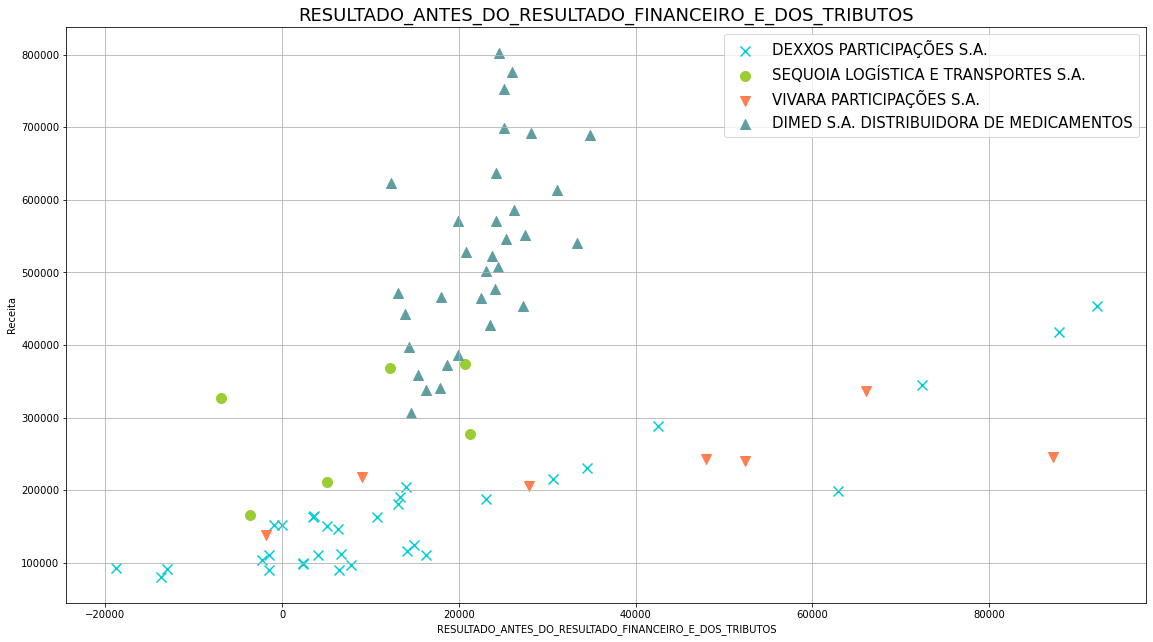

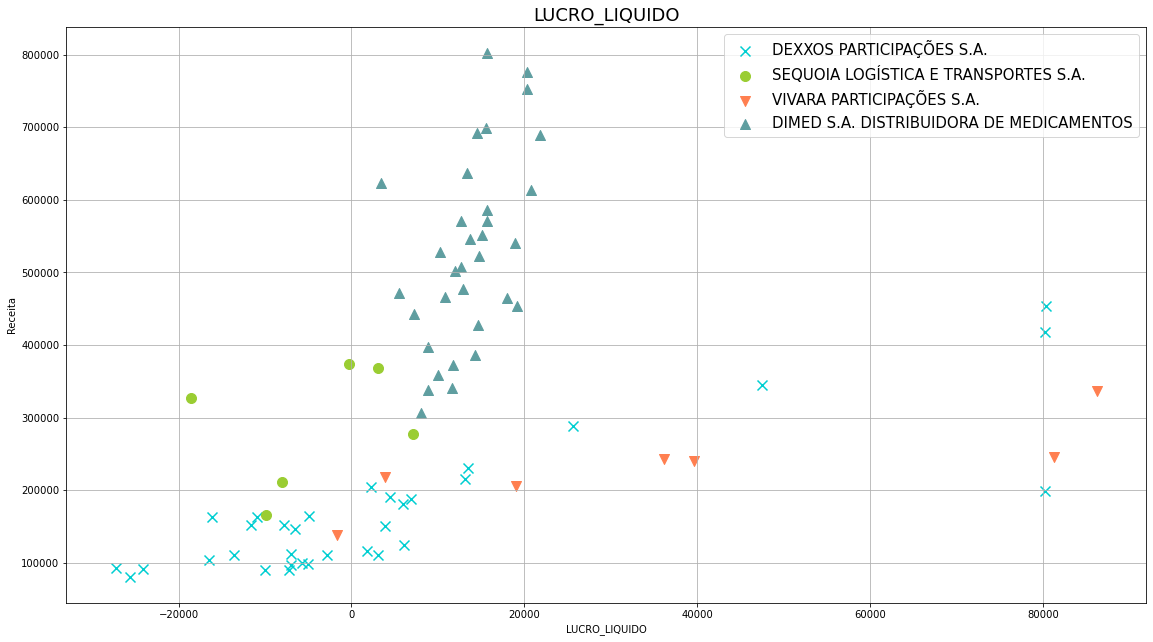

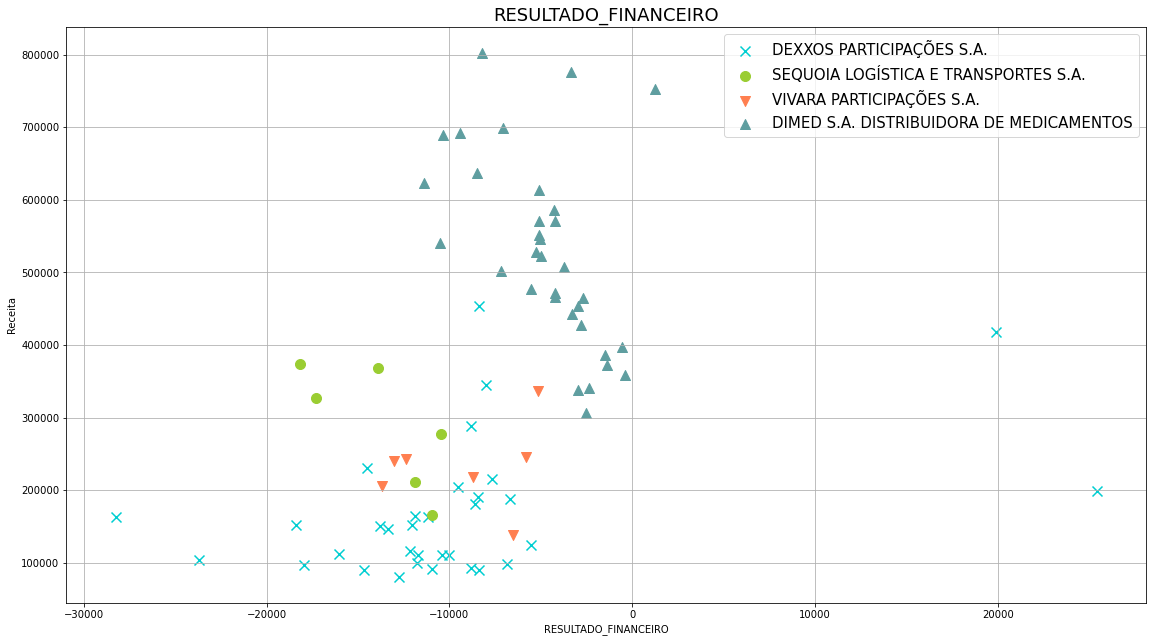

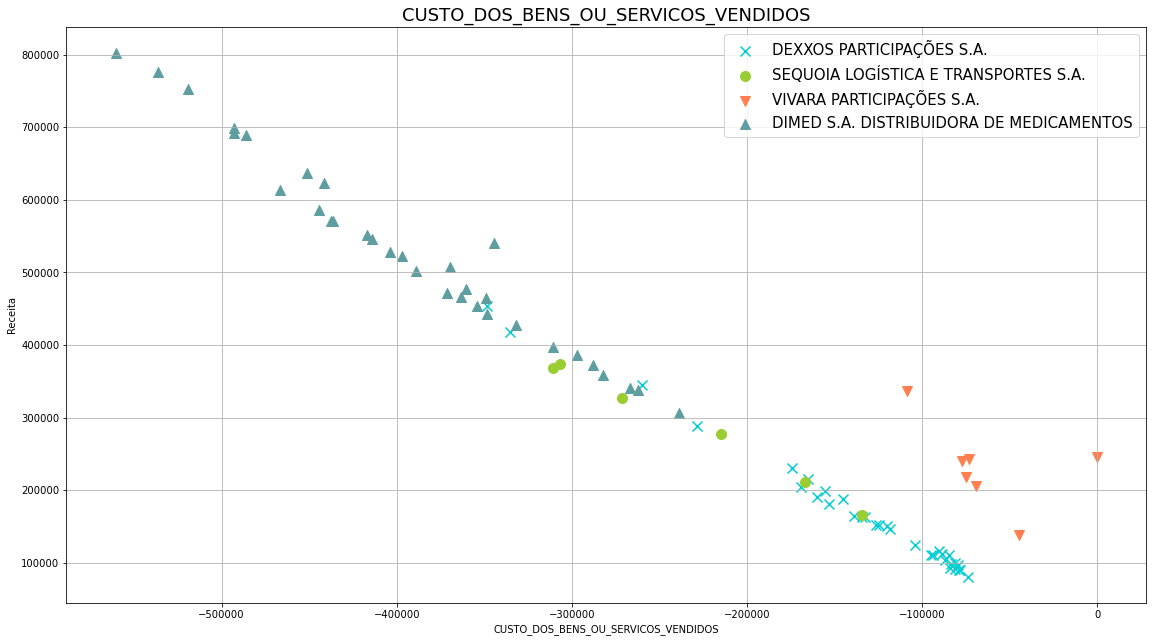

In [125]:

varlist = ['RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS','LUCRO_LIQUIDO', 'RESULTADO_FINANCEIRO', 'CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS']

for v in varlist:
    fig = plt.figure(figsize=(15,8))
    axis = fig.add_axes([0,0,1,1])

    comp = ['016632', '025160', '024805', '009342']
    for i in comp:
        temp = dataset[dataset['CD_CVM'] == i]
        axis.scatter(temp[v]/1000, temp['RECEITA_DE_VENDAS']/1000,
        color=colors[i], marker=mark[i], s=100)

    # Adicionando um limite para a exibição de datas
    axis.set_title(f'{v}', fontsize=18)
    axis.set_ylabel('Receita', fontsize=10)
    axis.set_xlabel(f'{v}', fontsize=10)
    axis.legend(companies, fontsize=15)
    axis.grid(True)

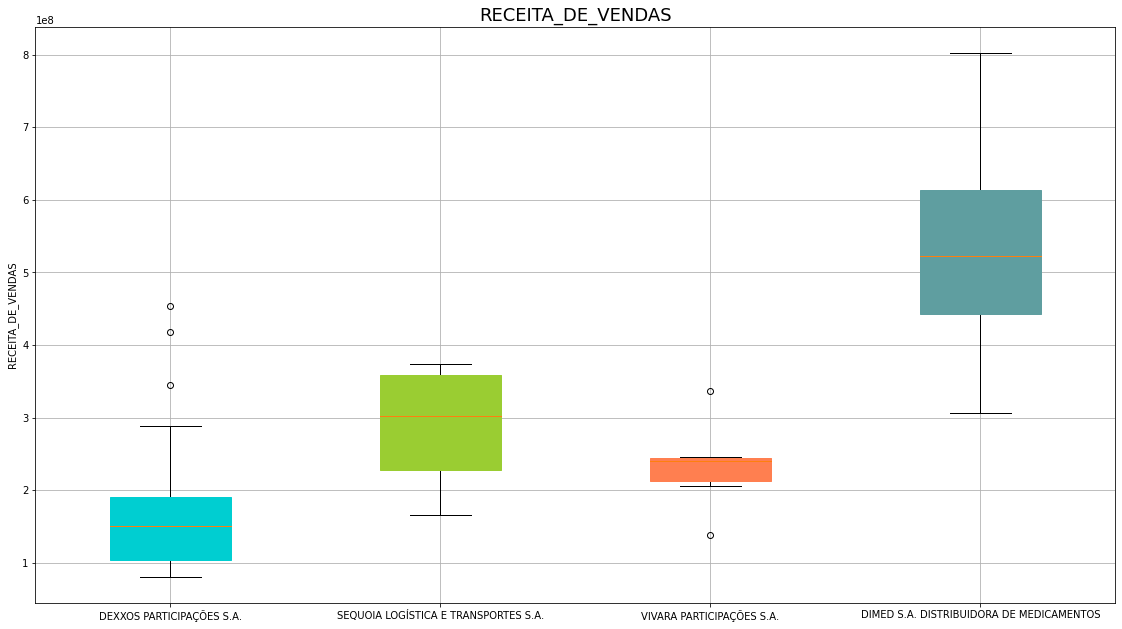

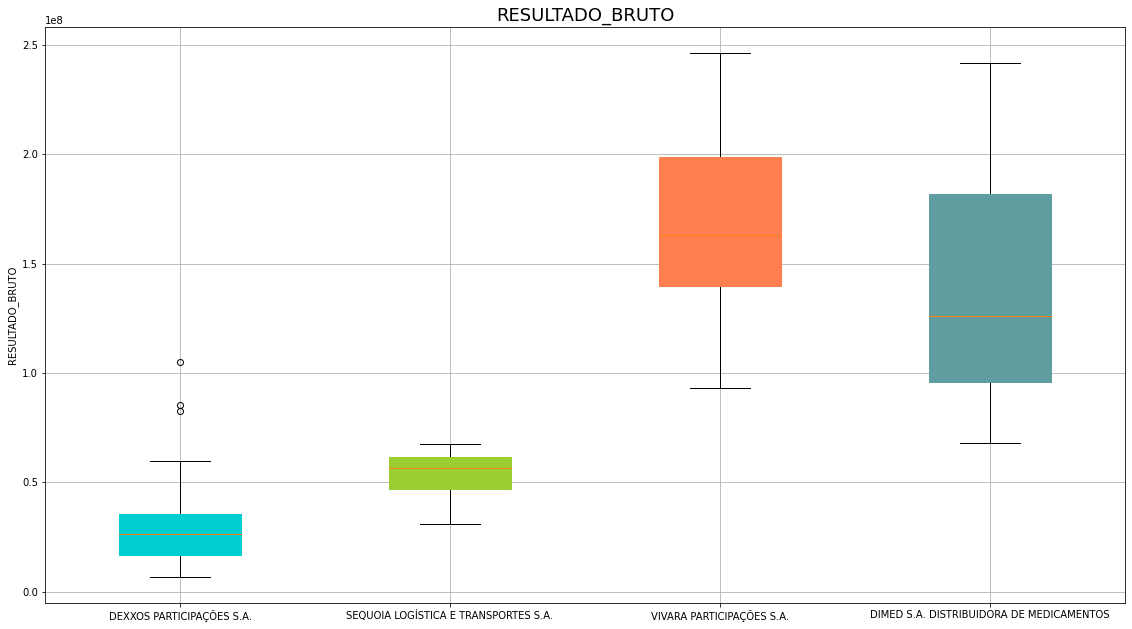

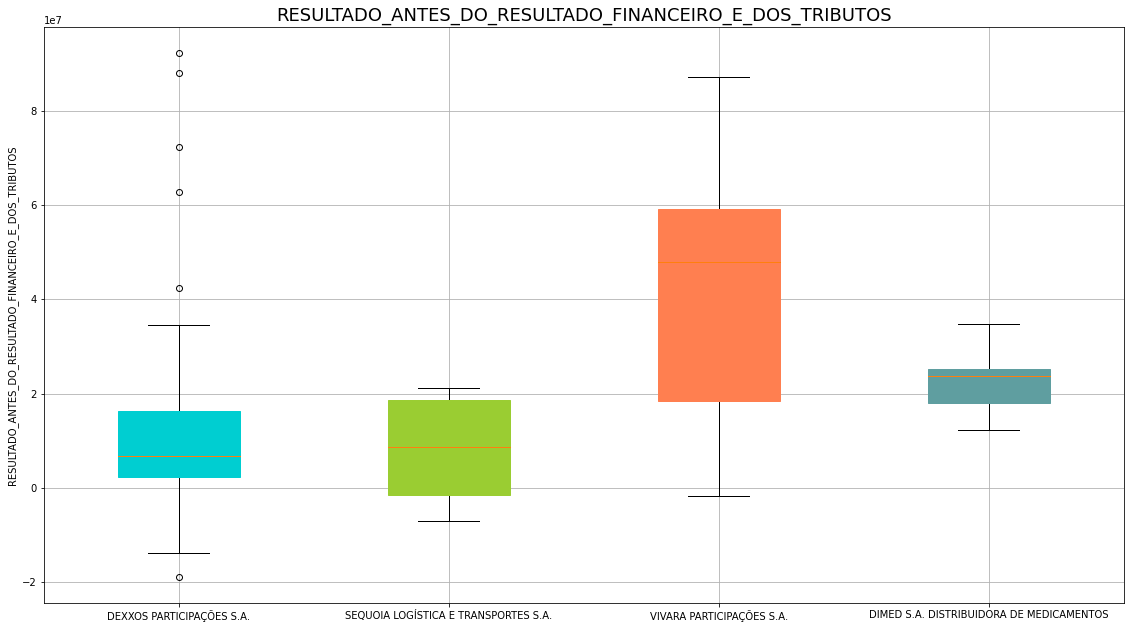

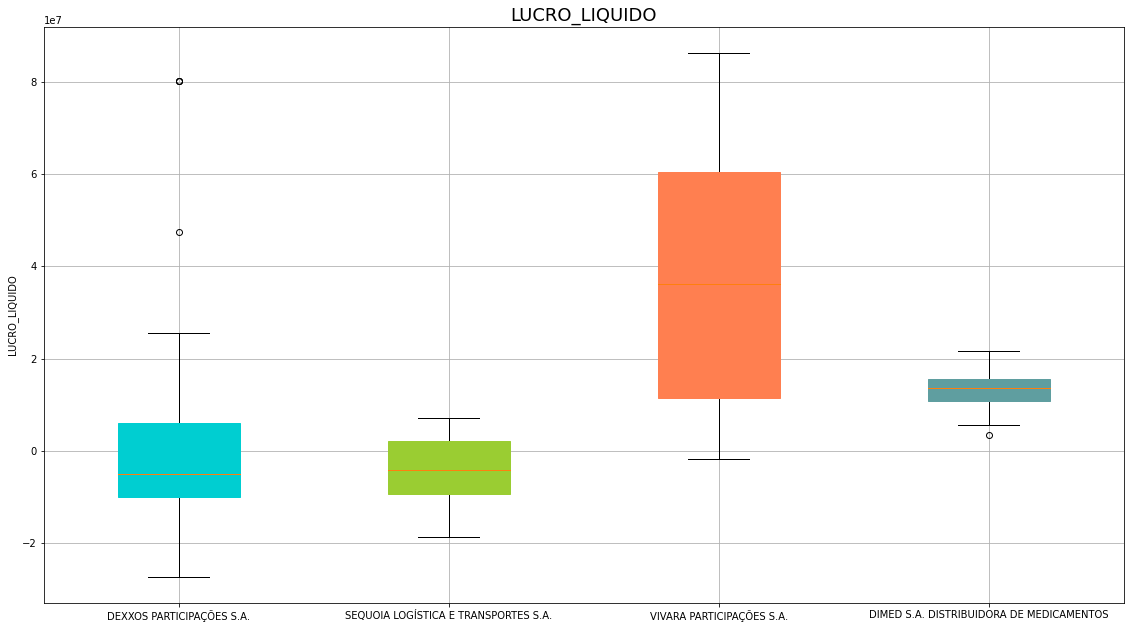

In [144]:
companies = ['DEXXOS PARTICIPAÇÕES S.A.',
    'SEQUOIA LOGÍSTICA E TRANSPORTES S.A.',
    'VIVARA PARTICIPAÇÕES S.A.',
    'DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS']

colors = [
    'darkturquoise',
    'yellowgreen',
    'coral',
    'cadetblue',
    'darkblue'
]

varlist = ['RECEITA_DE_VENDAS', 'RESULTADO_BRUTO', 'RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS','LUCRO_LIQUIDO']

for variable in varlist:
    d1 = dataset[dataset['CD_CVM'] == '016632'][variable]
    d2 = dataset[dataset['CD_CVM'] == '025160'][variable]
    d3 = dataset[dataset['CD_CVM'] == '024805'][variable]
    d4 = dataset[dataset['CD_CVM'] == '009342'][variable]

    data = [d1, d2, d3, d4]

    fig = plt.figure(figsize=(15,8))
    axis = fig.add_axes([0,0,1,1])

    box = axis.boxplot(data, patch_artist=True)

    for box, cor in zip(box['boxes'], colors):
        box.set(color=cor)

    # Adicionando um limite para a exibição de datas
    axis.set_title(f'{variable}', fontsize=18)
    axis.set_ylabel(f'{variable}', fontsize=10)
    axis.set_xticklabels(companies)
    axis.grid(True)

/tmp/ipykernel_55107/3926693927.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('teste.png', bbbox_inches='tight')


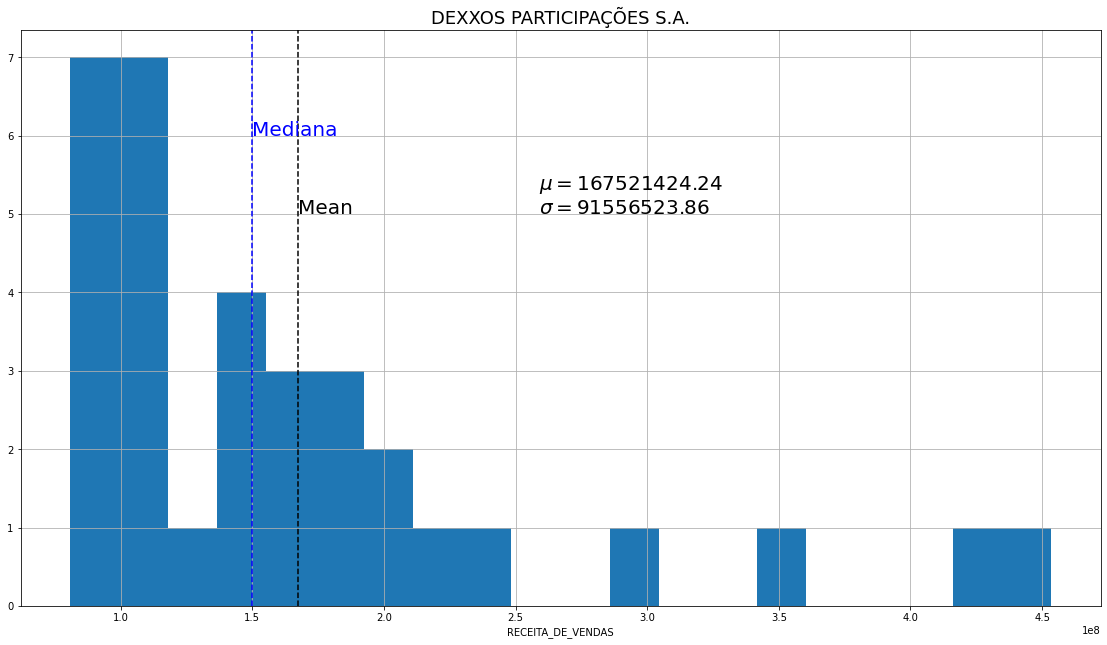

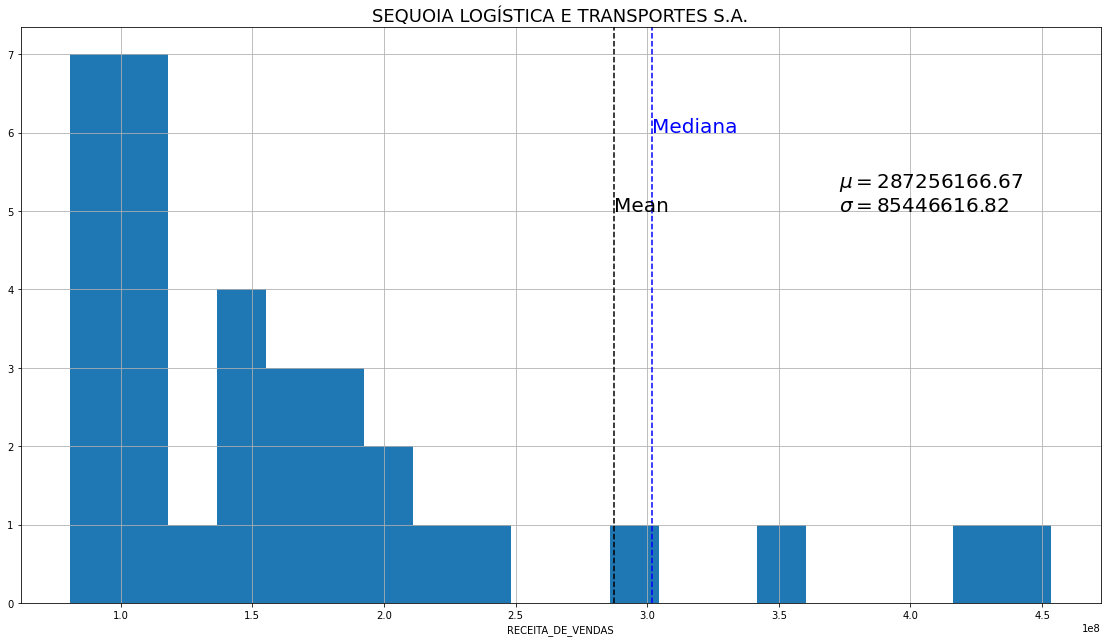

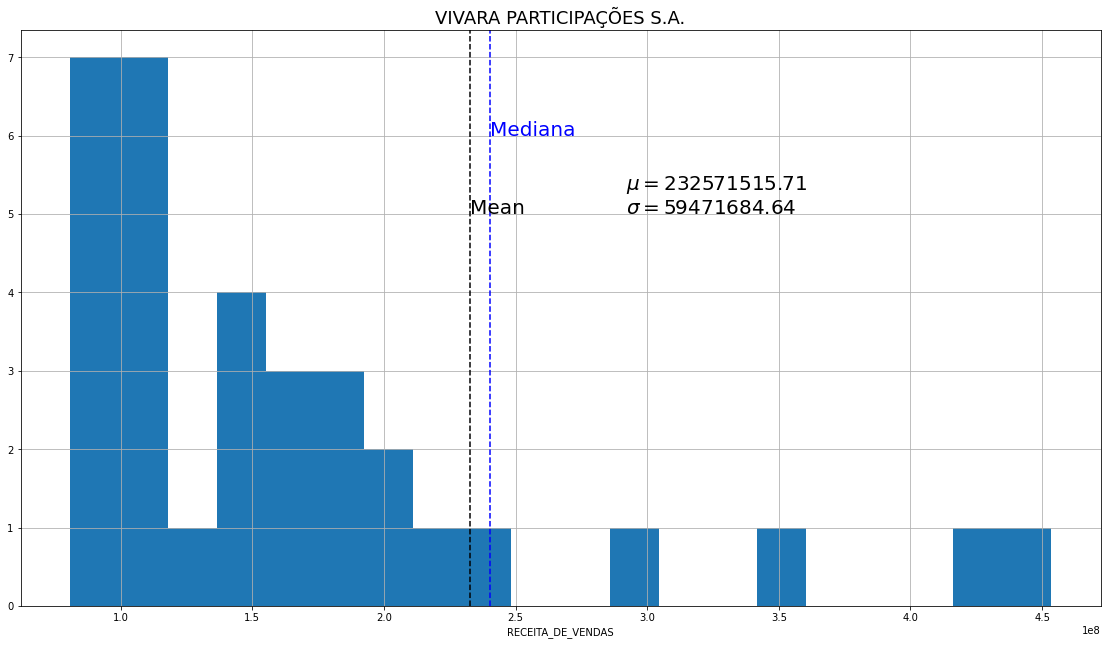

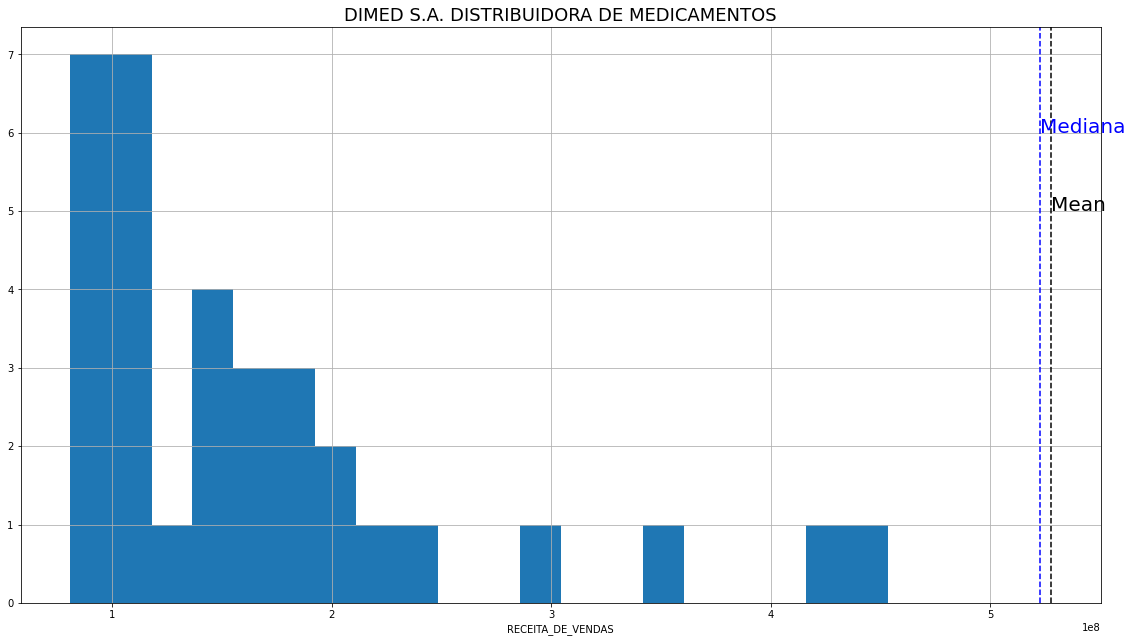

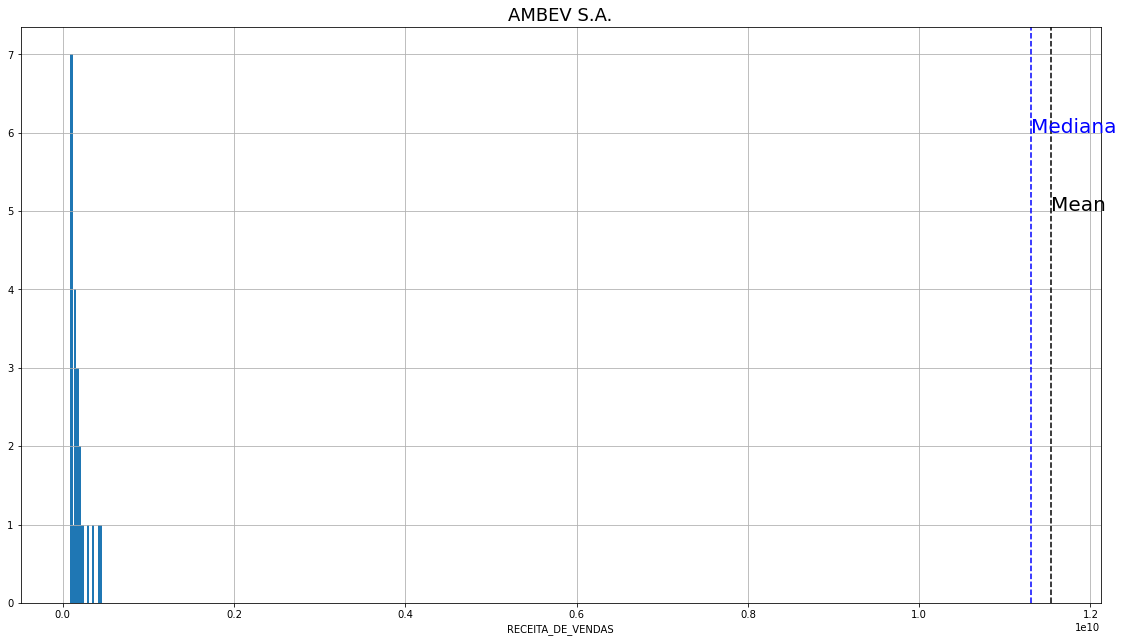

In [213]:

# varlist = ['RECEITA_DE_VENDAS', 'RESULTADO_BRUTO', 'RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS','LUCRO_LIQUIDO']

variable = 'RECEITA_DE_VENDAS'

companies = [
['DEXXOS PARTICIPAÇÕES S.A.','016632'],
['SEQUOIA LOGÍSTICA E TRANSPORTES S.A.','025160'],
['VIVARA PARTICIPAÇÕES S.A.','024805'],
['DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS','009342'],
['AMBEV S.A.','023264']
]

for code in companies:

    df = dataset[dataset['CD_CVM'] == code[1]]

    # Mean, STD
    mu, sigma, median = df[variable].mean(), df[variable].std(), df[variable].median()

    fig = plt.figure(figsize=(15,8))
    axis = fig.add_axes([0,0,1,1])

    axis.hist(d1[variable], bins=20)
    axis.set_title(f'{code[0]}', fontsize=18)
    axis.set_xlabel(variable, fontsize=10)
    axis.grid(True)

    axis.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma), xy=(mu+sigma, 5), fontsize=20)

    axis.axvline(mu, color='k', linestyle='--')
    axis.annotate('Mean', xy=(mu, 5), fontsize=20)

    axis.axvline(median, color='b', linestyle='--')
    axis.annotate('Mediana', xy=(median, 6), fontsize=20, color='b')

    fig.savefig('teste.png', bbbox_inches='tight')